In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
from imblearn.over_sampling import SMOTE

In [3]:
# Download dataset from KaggleHub
path = kagglehub.dataset_download("mathchi/churn-for-bank-customers")
print("Dataset path:", path)
churn_csv = os.path.join(path, "churn.csv")
df = pd.read_csv(churn_csv)


100%|██████████| 261k/261k [00:00<00:00, 49.4MB/s]

Extracting files...
Dataset path: /root/.cache/kagglehub/datasets/mathchi/churn-for-bank-customers/versions/1


In [4]:
# Preprocessing
df['Churn'] = df['Exited']
df.drop('Exited', axis=1, inplace=True)
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Churn', axis=1)
y = df['Churn']


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [7]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.78


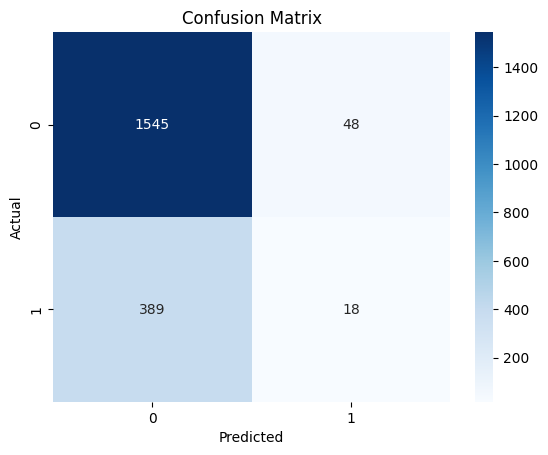

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.27      0.04      0.08       407

    accuracy                           0.78      2000
   macro avg       0.54      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



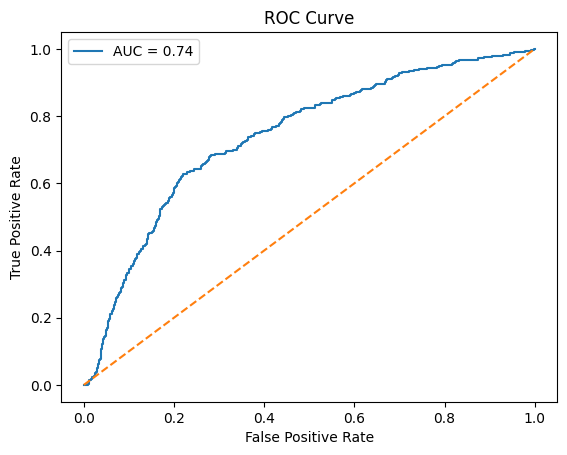

In [10]:
# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [11]:
# Coefficient interpretation
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
print("Model Coefficients:\n", coeffs)


Model Coefficients:
                 Feature  Coefficient
3                   Age     0.061897
2941  Geography_Germany     0.001255
1567        Surname_Lin     0.000028
1698     Surname_Martin     0.000026
1755   Surname_McGregor     0.000022
...                 ...          ...
6         NumOfProducts    -0.000225
2942    Geography_Spain    -0.000360
2           CreditScore    -0.000940
2943        Gender_Male    -0.001141
8        IsActiveMember    -0.001624

[2944 rows x 2 columns]


In [12]:
# Balancing with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", dict(zip(*np.unique(y_resampled, return_counts=True))))

Class distribution after SMOTE: {np.int64(0): np.int64(6370), np.int64(1): np.int64(6370)}
